In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 19 16:19:02 2024

@author: sebw
"""
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:

data_loc = "GE_data.csv"

data = pd.read_csv(data_loc)

baseline_wins = data["First party"]
parties_of_interest = ["Labour", "Conservative", "Liberal Democrats", "Reform", "Others"]
COLUMN_PARTIES = list(range(18, data.columns.size)) # data specific stuff
COLUMN_PARTIES.pop(-2)

# The below is the probability that given a voter chooses to not vote reform
# that they will then vote for a different party (inc. not voting)

switch_conditions = {"Lab": 0., "Con": 1.0, "nothing": 0.0} # probs need to add up to 1.0  
switch_conditions = {"Lab": 0.2, "Con": 0.5, "nothing": 0.3} # probs need to add up to 1.0  
# switch_conditions = {"Lab": 1, "Con": 7, "nothing": 0} # demonstrates that this works


# sum up all items in switch_conditions; if not 1.0, normalize
if (denom := sum(switch_conditions.values())) != 1.0:
    for key in switch_conditions.keys():
        switch_conditions[key] /= denom
        

In [3]:

def get_seat_nums(data):
    look_up_table = {"Lab":"Labour", "Con": "Conservative", \
                     "LD": "Liberal Democrats", "RUK": "Reform"}
    results = {x : 0 for x in parties_of_interest}
#    results = {"Labour": 0, "Conservative": 0, "Liberal Democrats": 0, "Reform": 0}
    for constituency_winner in data:
        if constituency_winner not in look_up_table:
            results["Others"] += 1
        else:
            results[look_up_table[constituency_winner]] += 1
    return results

def get_winners_from_data(data):   
    winning_parties = data.iloc[:, COLUMN_PARTIES].idxmax(axis="columns")
    return get_seat_nums(winning_parties)

def counter_factual_swing(data, prob):
    cf_data = data.copy(deep=True)
    ruk_votes = cf_data["RUK"]
    con_votes = cf_data["Con"]
    swing_votes = np.ceil(prob*ruk_votes).astype(int)
    new_ruk_votes = np.floor((1-prob)*ruk_votes).astype(int)
    cf_data["RUK"] = new_ruk_votes
    cf_data["Con"] = con_votes + swing_votes
    
    return cf_data



def counter_factual_swing(data, prob):
    cf_data = data.copy(deep=True)
    ruk_votes = cf_data["RUK"]
    swing_votes = np.ceil(prob*ruk_votes).astype(int)
    lab_swing_votes = np.ceil(switch_conditions["Lab"]*swing_votes).astype(int)
    con_swing_votes = np.ceil(switch_conditions["Con"]*swing_votes).astype(int)
    new_ruk_votes = np.floor((1-prob)*ruk_votes).astype(int)
    cf_data["RUK"] = new_ruk_votes
    cf_data["Con"] += con_swing_votes
    cf_data["Lab"] += lab_swing_votes
    
    return cf_data


In [4]:
cf_prob_tests = 200
counterfactual_values = np.linspace(0, 1, cf_prob_tests + 1, endpoint=True)
tally = {}

for p in tqdm(counterfactual_values):
    cf_results = get_winners_from_data(counter_factual_swing(data, p))
    tally[p] = {P: cf_results[P] for P in parties_of_interest}
 

100%|██████████| 201/201 [00:00<00:00, 563.08it/s]


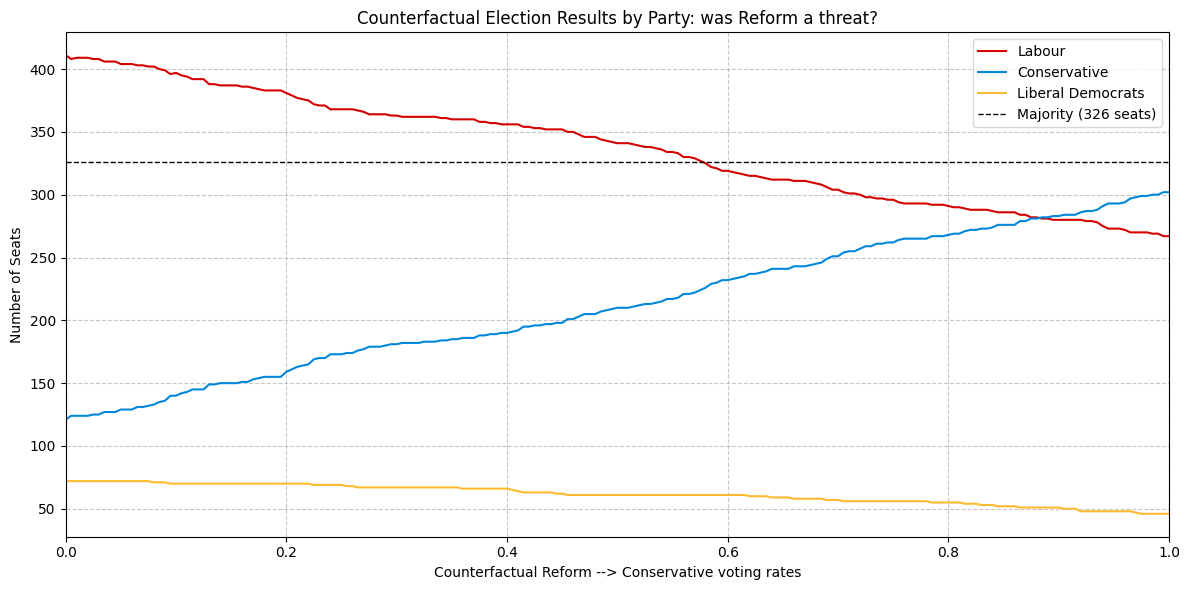

Switch conditions are: {'Lab': 0.0, 'Con': 1.0, 'nothing': 0.0}


In [5]:
   
    
plotting_parties_of_interest = parties_of_interest[:3]

# After your existing code, add the following:

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each party
# Define colors for each party
colors = {
    'Labour': '#d50000',
    'Conservative': '#0087dc',
    'Liberal Democrats': '#FDBB30'
}

# Plot data for each party
for party in plotting_parties_of_interest:
    party_seats = [tally[p][party] for p in counterfactual_values]
    plt.plot(counterfactual_values, party_seats, label=party, color=colors[party])


# Add a horizontal line for the majority
majority_seats = 326
plt.axhline(y=majority_seats, color='black', linestyle='--', linewidth=1, label='Majority (326 seats)')

# Customize the plot
plt.xlabel('Counterfactual Reform --> Conservative voting rates')
plt.ylabel('Number of Seats')
plt.title('Counterfactual Election Results by Party: was Reform a threat?')
plt.xlim(-0.0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
print("Switch conditions are:", switch_conditions)

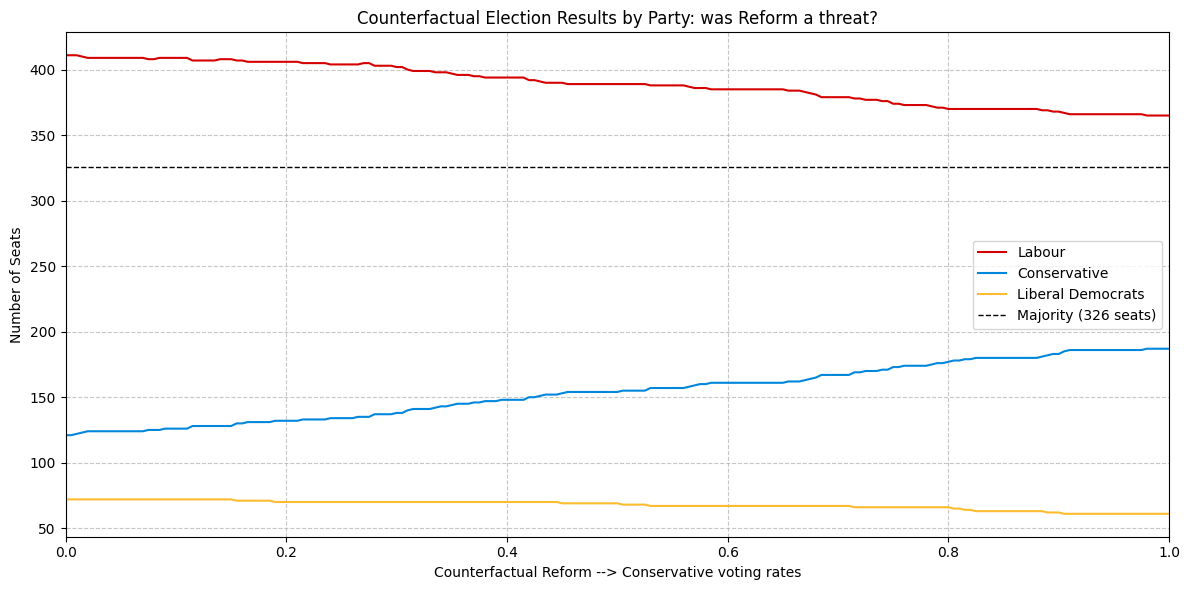

Switch conditions are: {'Lab': 0.2, 'Con': 0.5, 'nothing': 0.3}


In [5]:
   
    
plotting_parties_of_interest = parties_of_interest[:3]

# After your existing code, add the following:

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each party
# Define colors for each party
colors = {
    'Labour': '#d50000',
    'Conservative': '#0087dc',
    'Liberal Democrats': '#FDBB30'
}

# Plot data for each party
for party in plotting_parties_of_interest:
    party_seats = [tally[p][party] for p in counterfactual_values]
    plt.plot(counterfactual_values, party_seats, label=party, color=colors[party])


# Add a horizontal line for the majority
majority_seats = 326
plt.axhline(y=majority_seats, color='black', linestyle='--', linewidth=1, label='Majority (326 seats)')

# Customize the plot
plt.xlabel('Counterfactual Reform --> Conservative voting rates')
plt.ylabel('Number of Seats')
plt.title('Counterfactual Election Results by Party: was Reform a threat?')
plt.xlim(-0.0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
print("Switch conditions are:", switch_conditions)